In [1]:
#import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

C:\Users\piyus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the dataset

df = pd.read_csv("indian_liver_patient.csv")
df.head(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   
5   46    Male              1.8               0.7                   208   
6   26  Female              0.9               0.2                   154   
7   29  Female              0.9               0.3                   202   
8   17    Male              0.9               0.3                   202   
9   55    Male              0.7               0.2                   290   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   
6                        16                          12             7.0   
7                        14                          11             6.7   
8                        22                          19             7.4   
9                        53                          58             6.8   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1  
5      4.4                        1.30        1  
6      3.5                        1.00        1  
7      3.6                        1.10        1  
8      4.1                        1.20        2  
9      3.4                        1.00        1

In [3]:
#check the shape of the data

df.shape

(583, 11)

In [4]:
#check the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
#check the null values

df.isnull().sum()
df = df.dropna()

In [6]:
#renaming the columns  

df =  df.rename(columns={'Dataset':'Liver_disease','Alamine_Aminotransferase':'Alanine_Aminotransferase'}, inplace=False)
df['Liver_disease'] = df['Liver_disease'] - 1

In [7]:
#check the basic statistics

df.describe().T

count        mean         std   min    25%  \
Age                         579.0   44.782383   16.221786   4.0   33.0   
Total_Bilirubin             579.0    3.315371    6.227716   0.4    0.8   
Direct_Bilirubin            579.0    1.494128    2.816499   0.1    0.2   
Alkaline_Phosphotase        579.0  291.366149  243.561863  63.0  175.5   
Alanine_Aminotransferase    579.0   81.126079  183.182845  10.0   23.0   
Aspartate_Aminotransferase  579.0  110.414508  289.850034  10.0   25.0   
Total_Protiens              579.0    6.481693    1.084641   2.7    5.8   
Albumin                     579.0    3.138515    0.794435   0.9    2.6   
Albumin_and_Globulin_Ratio  579.0    0.947064    0.319592   0.3    0.7   
Liver_disease               579.0    0.284974    0.451792   0.0    0.0   

                               50%    75%     max  
Age                          45.00   58.0    90.0  
Total_Bilirubin               1.00    2.6    75.0  
Direct_Bilirubin              0.30    1.3    19.7  
Alkaline_Phosphotase        208.00  298.0  2110.0  
Alanine_Aminotransferase     35.00   61.0  2000.0  
Aspartate_Aminotransferase   42.00   87.0  4929.0  
Total_Protiens                6.60    7.2     9.6  
Albumin                       3.10    3.8     5.5  
Albumin_and_Globulin_Ratio    0.93    1.1     2.8  
Liver_disease                 0.00    1.0     1.0

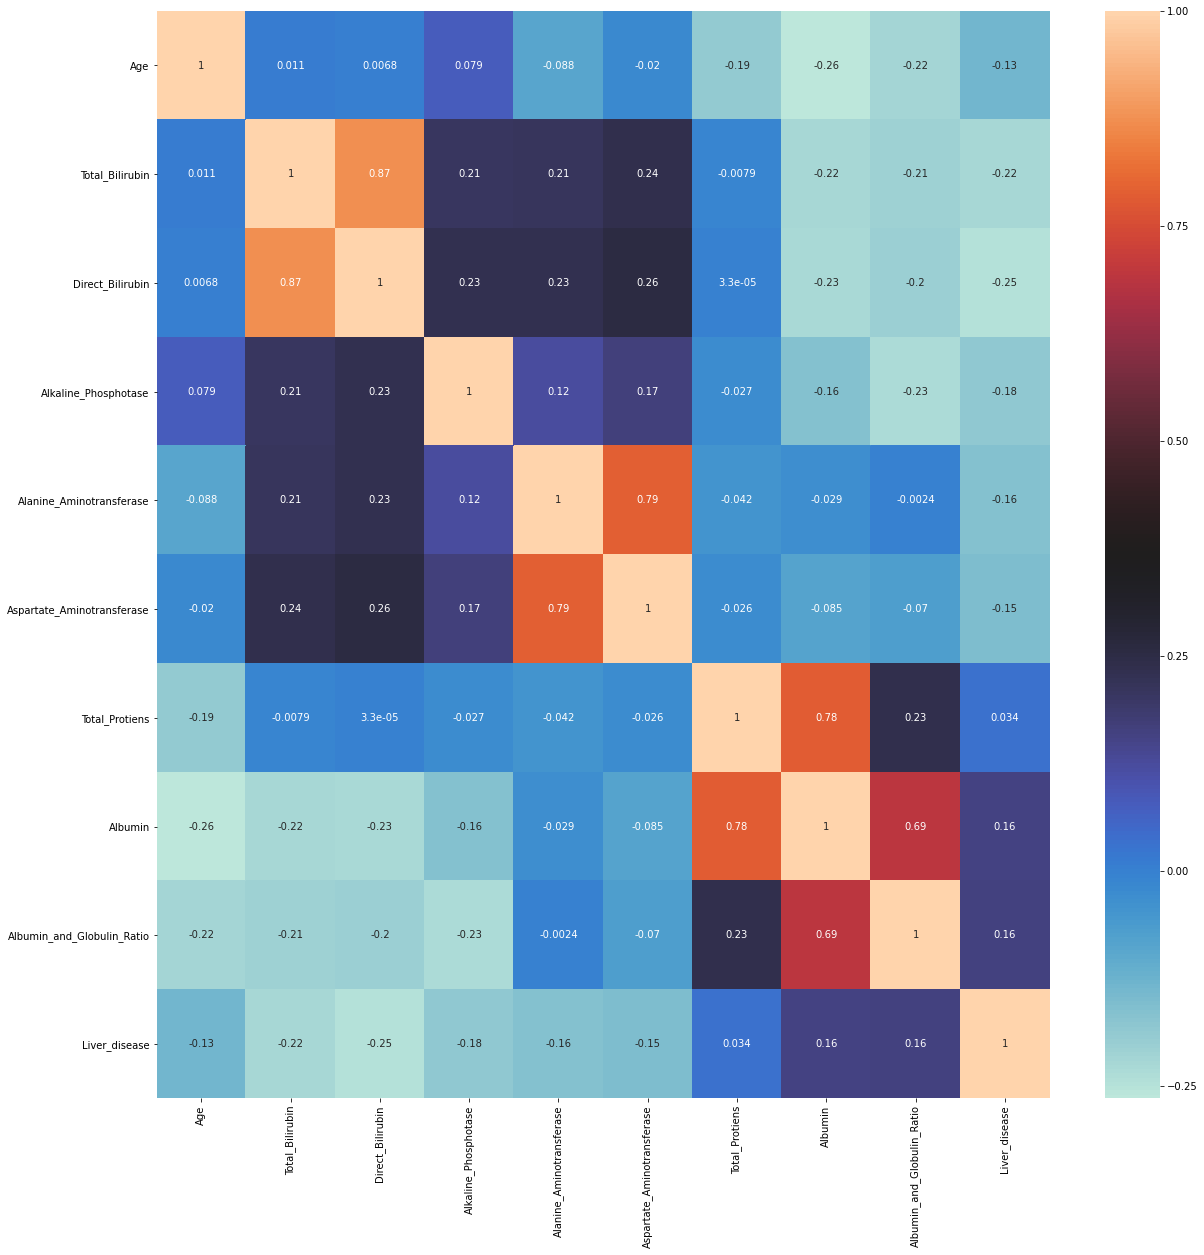

In [8]:
#check the correlation of the data

corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True, cmap = "icefire")
plt.show()

Number of patients diagnosed with liver disease: 414
Number of patients not diagnosed with liver disease: 165


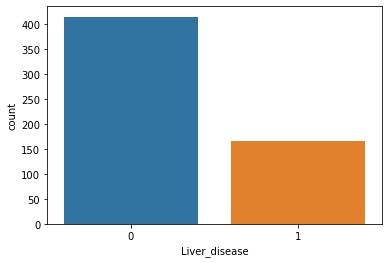

In [9]:
sns.countplot(data=df, x = 'Liver_disease', label='Count')
LD, NLD = df['Liver_disease'].value_counts()
print('Number of patients diagnosed with liver disease: {}'.format(LD))
print('Number of patients not diagnosed with liver disease: {}'.format(NLD))

In [10]:
#perform labelencoding on the gender column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Gender"].unique()
df.head(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   
5   46       1              1.8               0.7                   208   
6   26       0              0.9               0.2                   154   
7   29       0              0.9               0.3                   202   
8   17       1              0.9               0.3                   202   
9   55       1              0.7               0.2                   290   

   Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   
6                        16                          12             7.0   
7                        14                          11             6.7   
8                        22                          19             7.4   
9                        53                          58             6.8   

   Albumin  Albumin_and_Globulin_Ratio  Liver_disease  
0      3.3                        0.90              0  
1      3.2                        0.74              0  
2      3.3                        0.89              0  
3      3.4                        1.00              0  
4      2.4                        0.40              0  
5      4.4                        1.30              0  
6      3.5                        1.00              0  
7      3.6                        1.10              0  
8      4.1                        1.20              1  
9      3.4                        1.00              0

In [11]:
y = df['Liver_disease']
X = df.drop('Liver_disease',axis=1)


In [12]:

from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [13]:
print(model.feature_importances_)

[0.12007927 0.02520372 0.10892696 0.10500781 0.11799584 0.11726024
 0.1175421  0.08937149 0.09680556 0.10180701]


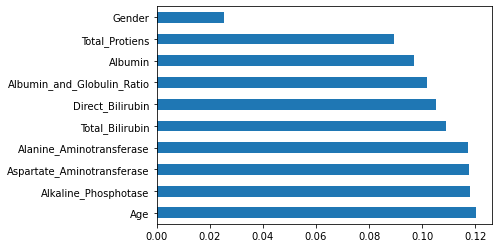

In [14]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
from sklearn import preprocessing

X_scaler = preprocessing.normalize(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaler ,y, test_size = 0.20, random_state= 1)



In [17]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report of this model - ")
print(classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.7413793103448276
Report of this model - 
              precision    recall  f1-score   support

           0      0.783     0.878     0.828        82
           1      0.583     0.412     0.483        34

    accuracy                          0.741       116
   macro avg      0.683     0.645     0.655       116
weighted avg      0.724     0.741     0.727       116

Accuracy score -  0.7413793103448276


In [19]:
import pickle
# open a file, where you ant to store the data
file = open('liver_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)